In [1]:
import numpy as np
import matplotlib.pyplot as plt
import flopy
from flopy.plot import styles

In [13]:
import os

In [4]:
ws = "./data/mumodel_orig"
name = "7-2b.nam"
exe_name = "mf2k5"

In [5]:
m = flopy.modflow.Modflow.load(name, model_ws=ws)

In [7]:
m.get_package_list()

['DIS', 'BAS6', 'LPF', 'WEL', 'RCH', 'OC', 'PCG']

In [8]:
m.model_ws = "./data/mumodel_mf2k5"

In [9]:
m.external_path = "."

In [28]:
m.write_name_file()

In [10]:
m.write_input()

Util2d:delr: resetting 'how' to external
Util2d:delc: resetting 'how' to external
Util2d:model_top: resetting 'how' to external
Util2d:botm_layer_0: resetting 'how' to external
Util2d:ibound_layer_0: resetting 'how' to external
Util2d:strt_layer_0: resetting 'how' to external
Util2d:hk: resetting 'how' to external
Util2d:vk: resetting 'how' to external
Util2d:ss: resetting 'how' to external
Util2d:sy: resetting 'how' to external
Util2d:rech_1: resetting 'how' to external
Util2d:rech_2: resetting 'how' to external
Util2d:rech_3: resetting 'how' to external
Util2d:rech_4: resetting 'how' to external
Util2d:rech_5: resetting 'how' to external
Util2d:rech_6: resetting 'how' to external
Util2d:rech_7: resetting 'how' to external
Util2d:rech_8: resetting 'how' to external
Util2d:rech_9: resetting 'how' to external
Util2d:rech_10: resetting 'how' to external
Util2d:rech_11: resetting 'how' to external
Util2d:rech_12: resetting 'how' to external
Util2d:rech_13: resetting 'how' to external
Util

In [23]:
m.exe_name = os.path.join(m.model_ws, "mf2005.exe")

In [29]:
m.run_model()

FloPy is using the following executable to run the model: mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: 7-2b.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2024/01/30 15:36:57

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     7    Ground-Water Flow Eqn.
 

(True, [])

In [30]:
hds = flopy.utils.HeadFile(os.path.join(m.model_ws, "7-2b.hds"))

In [33]:
hds.get_times()

[1.0,
 2.8788917,
 5.133562,
 7.8391666,
 11.085892,
 14.981962,
 19.657248,
 25.26759,
 32.0,
 33.697063,
 35.73354,
 38.17731,
 41.109837,
 44.62887,
 48.851704,
 53.91911,
 59.999996,
 61.878887,
 64.13356,
 66.839165,
 70.08589,
 73.981964,
 78.65725,
 84.26759,
 91.00001,
 92.81829,
 95.00023,
 97.61855,
 100.760544,
 104.53094,
 109.055405,
 114.484764,
 121.0,
 122.87889,
 125.13356,
 127.839165,
 131.08589,
 134.98196,
 139.65724,
 145.26758,
 151.99998,
 153.81827,
 156.00021,
 158.61855,
 161.76054,
 165.53093,
 170.0554,
 175.48477,
 182.0,
 183.87889,
 186.13356,
 188.83916,
 192.08588,
 195.98195,
 200.65723,
 206.26756,
 212.99997,
 214.87886,
 217.13353,
 219.83913,
 223.08585,
 226.98192,
 231.6572,
 237.26753,
 243.99994,
 245.81822,
 248.00017,
 250.6185,
 253.7605,
 257.53088,
 262.05536,
 267.4847,
 273.99994,
 275.87885,
 278.1335,
 280.8391,
 284.08585,
 287.9819,
 292.6572,
 298.26755,
 304.99997,
 306.81824,
 309.00018,
 311.6185,
 314.7605,
 318.53088,
 323.055

In [34]:
hds.get_data().shape

(1, 21, 9)

In [35]:
import matplotlib.pyplot as plt

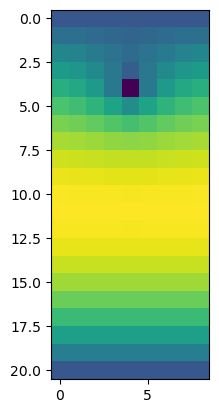

In [36]:
plt.imshow(hds.get_data()[0])

In [ ]:
# create simulation

# create tdis package

# create iterative model solution


Create the gwf model object using `flopy.mf6.ModflowGwf()`. 

Create the discretization package using `flopy.mf6.ModflowGwfdis()`.

In [ ]:
# dis data


`flopy.plot.PlotMapView()` and `flopy.plot.PlotCrossSection()` can be used to confirm that the discretization is correctly defined.

#### Create the initial conditions (IC) package

Create the discretization package using `flopy.mf6.ModflowGwfic()` and set the initial head (`strt`) to 320. Default values can be used for the rest of the initial conditions package input.

#### Create the node property flow (NPF) package

The hydraulic properties for the model are defined in the image above. The first layer should be convertible (unconfined) and the remaining two layers will be non-convertible so `icelltype` should be `[1, 0, 0]`. The variable `save_specific_discharge` should be set to `True` so that specific discharge data are saved to the cell-by-cell file and can be used to plot discharge.

In [ ]:
# create kh, kv, and icelltype


#### Create the recharge package

The recharge rate is defined in the image above. Use the `flopy.mf6.ModflowGwfrcha()` method to specify recharge data using arrays.

#### Create the well package

The well is located in layer 3, row 11, column 10. The pumping rate is defined in the image above.

#### Create the river package

The river is located in layer 1 and column 20 in every row in the model. The river stage stage and bottom are at 320 and 318, respectively; the river conductance is 1e5.

#### Build output control

Define the output control for the model using the `flopy.mf6.ModflowGwfoc` method to `[('HEAD', 'ALL'), ('BUDGET', 'ALL')]` to save the head and flow for the model. Because we haven't set `SAVE_FLOWS` to `True` in all of the  packages we can set `.name_file.save_flows` to `True` for the groundwater flow model (`gwf`) to save flows for all packages that can save flows. Also the head (`head_filerecord`) and cell-by-cell flow (`budget_filerecord`) files should be set to `name+'.hds'` and `name+'.cbc'`, respectively.

#### Write the model files and run the model

#### Post-process the results

Load the heads and face flows from the hds and cbc files. The head file can be loaded with the `gwf.output.head()` method. The cell-by-cell file can be loaded with the `gwf.output.budget()` method.

The entries in the cell-by-cell file can be determined with the `.list_unique_records()` method on the cell budget file object.

Retrieve the `'DATA-SPDIS'` data type from the cell-by-cell file.

#### Plot the results

Plot the results using `flopy.plot.PlotMapView()`. The head results can be plotted using the `.plot_array()` method. The discharge results can be plotted using the `plot_specific_discharge()` method. Boundary conditions can be plotted using the `.plot_bc()` method.